In [ ]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

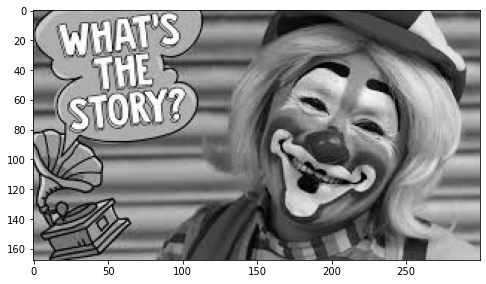

In [ ]:
image = cv2.imread('clown.jpeg') #Importing the Image from Colab temporary files ,Converting into gray scale using opencv

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (8,8))
plt.imshow(gray_image, cmap='gray')
plt.show()

In [ ]:
def gaussian_kernel(image,kernel_size,sigma): #Creation of gaussian kernel and Convolution with image with gaussian kernel
  width,height=image.shape
  shift_val=(kernel_size +1)/2
  kernel=np.zeros((kernel_size,kernel_size))
  gaussian_const=1/(2.5066*sigma)
  gaussian_expo_constant=-1/(2*np.square(sigma))
  for i in range(0,kernel_size):
    for j in range(0,kernel_size):
      kernel[i][j]=gaussian_const*np.exp(gaussian_expo_constant*(np.square(i-shift_val)+np.square(j-shift_val)))
   #convolution starts here
  pseudo_image=np.zeros((width+2*(kernel_size-1),height+2*(kernel_size-1)))
  pseudo_width,psuedo_height=pseudo_image.shape
  pseudo_image[(kernel_size-1):pseudo_width-(kernel_size-1),(kernel_size-1):psuedo_height-(kernel_size-1)]=pseudo_image[(kernel_size-1):pseudo_width-(kernel_size-1),(kernel_size-1):psuedo_height-(kernel_size-1)]+image
  output_image=np.zeros((width,height))
  for row in range(0,width):
    for col in range(0,height):
      output_image[row][col]=np.sum(np.dot(pseudo_image[row : row+kernel_size,col : col+kernel_size],kernel))/(kernel_size*kernel_size)
  return output_image

(168, 300) float64 False False


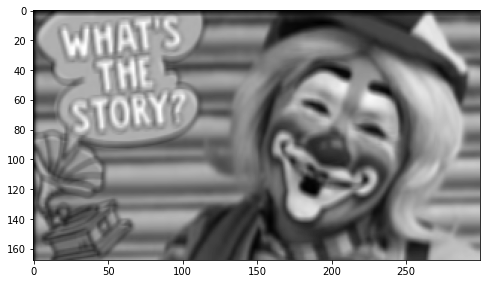

In [ ]:
outy=gaussian_kernel(gray_image,5,1.5) #Using the gaussian kernel function to smooth the image with sigma=1.5
# out[out>255] = 255
# out[out<0] = 0
print(outy.shape,outy.dtype,np.any(outy>255),np.any(outy<0))
plt.figure(figsize = (8,8))
plt.imshow(outy,cmap='gray')

In [ ]:
def sobelX_kernel(image,kernel_size): #Using standard Sobel kernel and Convolving with image with sobel kernel in X dir
  width,height=image.shape

  kernel= np.array([[ -2/8, -1/5, 0, 1/5, 2/8],
                    [ -2/5, -1/2, 0, 1/2, 2/5],
                    [ -2/4, -1/1, 0, 1/1, 2/4],
                    [ -2/5, -1/2, 0, 1/2, 2/5],
                    [ -2/8, -1/5, 0, 1/5, 2/8]])
  kernel = np.flipud(np.fliplr(kernel))
  #convolution starts here
  pseudo_image=np.zeros((width+2*(kernel_size-1),height+2*(kernel_size-1)))
  pseudo_width,psuedo_height=pseudo_image.shape
  pseudo_image[(kernel_size-1):pseudo_width-(kernel_size-1),(kernel_size-1):psuedo_height-(kernel_size-1)]=pseudo_image[(kernel_size-1):pseudo_width-(kernel_size-1),(kernel_size-1):psuedo_height-(kernel_size-1)]+image
  output_image=np.zeros((width,height))
  for col in range(0,height):
    for row in range(0,width):
      output_image[row][col]=np.sum(np.dot(pseudo_image[row : row+kernel_size,col : col+kernel_size],kernel))/(kernel_size*kernel_size)
  return output_image

In [ ]:
def sobelY_kernel(image,kernel_size): #Using standard Sobel kernel and Convolving with image with sobel kernel in Y dir
  width,height=image.shape
  kernel = np.array([[ -2/8, -2/5, -2/4, -2/5, -2/8],
                    [ -1/5, -1/2, -1/1, -1/2, -1/5],
                    [ 0, 0, 0, 0, 0],
                    [ 1/5, 1/2, 1/1, 1/2, 1/5],
                    [ 2/8, 2/5, 2/4, 2/5, 2/8]])
  kernel = np.flipud(np.fliplr(kernel))
   #convolution starts here
  pseudo_image=np.zeros((width+2*(kernel_size-1),height+2*(kernel_size-1)))
  pseudo_width,psuedo_height=pseudo_image.shape
  pseudo_image[(kernel_size-1):pseudo_width-(kernel_size-1),(kernel_size-1):psuedo_height-(kernel_size-1)]=pseudo_image[(kernel_size-1):pseudo_width-(kernel_size-1),(kernel_size-1):psuedo_height-(kernel_size-1)]+image
  output_image=np.zeros((width,height))
  for row in range(0,width):
    for col in range(0,height):
      output_image[row][col]=np.sum(np.dot(pseudo_image[row : row+kernel_size,col : col+kernel_size],kernel))/(kernel_size*kernel_size)
  return output_image

In [ ]:
def Gradient_Magnitude(fx, fy): #Calculating the total magnitude of gradient at every pixel using Right Triangle Hypotenuse Formula
    mag = np.zeros((fx.shape[0], fx.shape[1]))
    mag = np.sqrt((fx ** 2) + (fy ** 2))
    # mag = mag * 255 / mag.max()
    mag = mag * 255 / mag.max()
    return np.around(mag)

def Gradient_Direction(fx, fy): #Calculating the total direction of change at every pixel
    g_dir = np.zeros((fx.shape[0], fx.shape[1]))
    g_dir = np.rad2deg(np.arctan2(fy, fx)) + 180
    return g_dir

In [ ]:
magd=Gradient_Magnitude(sobelX_kernel(outy,5),sobelY_kernel(outy,5)) #Image with gradient magnitude at every pixel
direc=Gradient_Direction(sobelX_kernel(outy,5),sobelY_kernel(outy,5)) #Image with gradient direction at every pixel

Text(0.5, 1.0, 'Magnitude of Gradient Image')

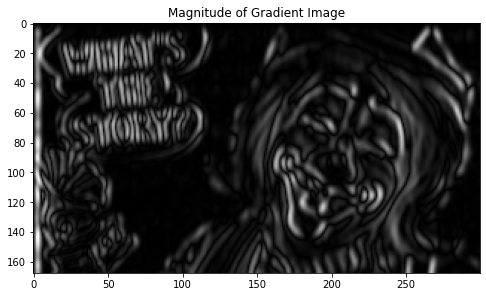

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(magd, cmap ='gray')
plt.title("Magnitude of Gradient Image")

Text(0.5, 1.0, 'Direction of Gradient Image')

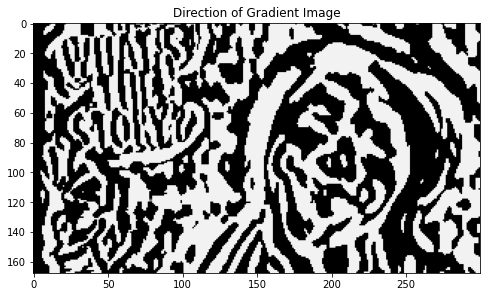

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(direc, cmap ='gray')
plt.title("Direction of Gradient Image")

In [ ]:

mag=magd
angle=direc
# Find the neighbouring pixels (b,c) in the rounded gradient direction
# and then apply non-max suppression
M, N = mag.shape
Non_max = np.zeros((M,N), dtype= np.uint8)
b=0
c=0
for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]

        # Non-max Suppression
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]
        else:
            Non_max[i,j] = 0

Text(0.5, 1.0, 'Non Max Supressed Image')

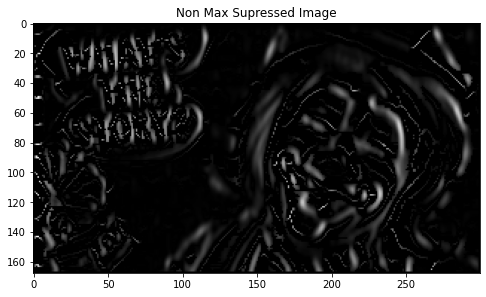

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(Non_max, cmap ='gray') #Final Image with Non-maxima Suppression
plt.title("Non Max Supressed Image")

In [ ]:
median_value=np.median(Non_max)

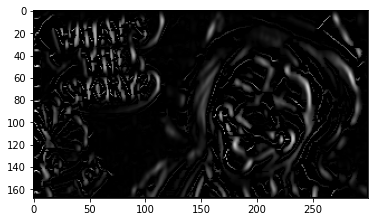

In [ ]:
Non_max[Non_max<median_value]=0  #Image has less noise compared to Non_max_suppresed image.Also,edges have become thinner comparatively.
plt.imshow(Non_max, cmap ='gray')

In [ ]:
outy_highSigma=gaussian_kernel(gray_image,19,3)
magd_highSigma=Gradient_Magnitude(sobelX_kernel(outy_highSigma,5),sobelY_kernel(outy_highSigma,5)) #Image with gradient magnitude at every pixel
direc_highSigma=Gradient_Direction(sobelX_kernel(outy_highSigma,5),sobelY_kernel(outy_highSigma,5)) #Image with gradient direction at every pixel
mag=magd_highSigma
angle=direc_highSigma
# Find the neighbouring pixels (b,c) in the rounded gradient direction
# and then apply non-max suppression
M, N = mag.shape
Non_max = np.zeros((M,N), dtype= np.uint8)
b=0
c=0
for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]

        # Non-max Suppression
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]
        else:
            Non_max[i,j] = 0

Text(0.5, 1.0, 'Non Max Supressed Image')

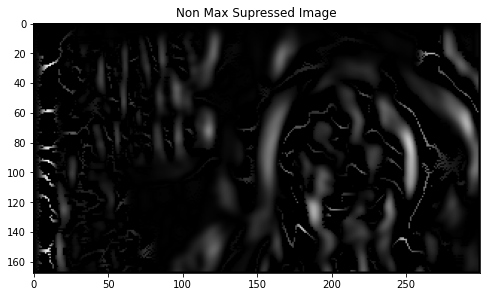

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(Non_max, cmap ='gray') #Final Image with Non-maxima Suppression on gaussian image with sigma=3.0
plt.title("Non Max Supressed Image")

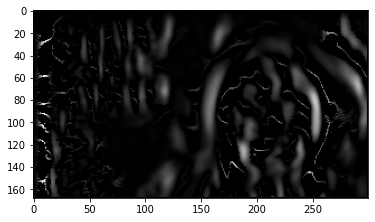

In [ ]:
median_value=np.median(Non_max)
Non_max[Non_max<median_value]=0  #Image has less noise compared to Non_max_suppresed image.Also,edges have become thinner comparatively.
plt.imshow(Non_max, cmap ='gray')